# Optimization with the Clonal Selection Algorithm (CLONALG)

## 1. Introduction

### Traveling Salesman Problem (TSP)

In this notebook, we apply **ClonAlg** to the **Traveling Salesman Problem (TSP)**.

The problem consists of finding the shortest route that visits each city exactly once and returns to the starting city.

## 2. Setup

### Installation of the required libraries.

In [ ]:
%pip install matplotlib
%pip install networkx
%pip install aisp
%pip install scipy

### Import of the required libraries

In [1]:
# Importing the Clonal Selection Algorithm (CLONALG)
from aisp.csa import Clonalg

# Libraries for data manipulation and numerical calculations
import numpy as np
import random
from itertools import combinations
from scipy.spatial import distance

# Data visualization
import matplotlib.pyplot as plt
import networkx as nx

## 3. Problem Definition

Create 15 cities with random coordinates and define the `tsp_fitness` function.

In [2]:
# Problem setup
n_cities = 15
cities = []
random.seed(123)

# Generate random coordinates for the cities
for i in range(n_cities):
    x = random.uniform(0, 100)
    y = random.uniform(0, 100)
    cities.append((x, y))

cities = np.array(cities)

# Fitness function for TSP
def tsp_fitness(solution):
    total_distance = 0
    n = len(solution)

    for i in range(n):
        current_city = cities[solution[i]]
        next_city = cities[solution[(i + 1) % len(solution)]]
        total_distance += distance.euclidean(current_city, next_city)
    return total_distance

print(f"Number of cities: {n_cities}")
print("City coordinates:")
for i, city in enumerate(cities):
    print(f"City {i}: ({city[0]:.2f}, {city[1]:.2f})")

Number of cities: 15
City coordinates:
City 0: (5.24, 8.72)
City 1: (40.72, 10.77)
City 2: (90.12, 3.82)
City 3: (53.62, 33.22)
City 4: (85.21, 15.97)
City 5: (33.72, 33.38)
City 6: (24.52, 0.17)
City 7: (43.63, 8.76)
City 8: (59.76, 6.99)
City 9: (31.55, 44.83)
City 10: (90.54, 9.28)
City 11: (14.22, 79.01)
City 12: (2.12, 91.12)
City 13: (57.34, 26.53)
City 14: (83.78, 76.88)


## 4. Algorithm Setup

In [3]:
clonalg = Clonalg(
    problem_size=n_cities,
    N=100,
    selection_size=15,
    rate_clonal=30,
    rate_hypermutation=3,
    n_diversity_injection=20,
    feature_type="permutation-features",
    seed=121
)

clonalg.register('affinity_function', tsp_fitness)

## 5. Optimization Execution

In [4]:
clonalg.optimize(500, 20)

if clonalg.best_cost is not None:
    print('Best distance found:', clonalg.best_cost)
    print('Best route:', clonalg.best_solution)


┌───────────┬─────────────────────────┬────────────────────┬─────────────────┐
│ Iteration │   Best Affinity (min)   │   Worse Affinity   │   Stagnation    │
├───────────┼─────────────────────────┼────────────────────┼─────────────────┤
│     1     │               603.855687│          823.417601│        0        │
│     2     │               560.431577│          656.611307│        0        │
│     3     │               541.960409│          764.707134│        0        │
│     4     │               514.734954│          833.599923│        0        │
│     5     │               503.850059│          750.053442│        0        │
│     6     │               495.427273│          798.079603│        0        │
│     7     │               472.914431│          908.857603│        0        │
│     8     │               449.949200│          853.719843│        0        │
│     9     │               449.949200│          855.685675│        1        │
│    10     │               429.920551│          91

## 6. Result

In [5]:
print(clonalg.get_report())


            Optimization Summary             
Best cost      : 382.9554837815304
Best solution  : [12 11  9  5  0  6  1  7  8  2 10  4 13  3 14]
Cost History per Iteration:

┌────────────┬────────────────────────────┐
│ Iteration  │            Cost            │
├────────────┼────────────────────────────┤
│          1 │                 603.855687 │
│          2 │                 560.431577 │
│          3 │                 541.960409 │
│          4 │                 514.734954 │
│          5 │                 503.850059 │
│          6 │                 495.427273 │
│          7 │                 472.914431 │
│          8 │                 449.949200 │
│          9 │                 449.949200 │
│         10 │                 429.920551 │
│         11 │                 429.920551 │
│         12 │                 422.582390 │
│         13 │                 422.582390 │
│         14 │                 416.450778 │
│         15 │                 416.450778 │
│         16 │                 40

### 6.1 Evolution of the Best Solution Across Generations

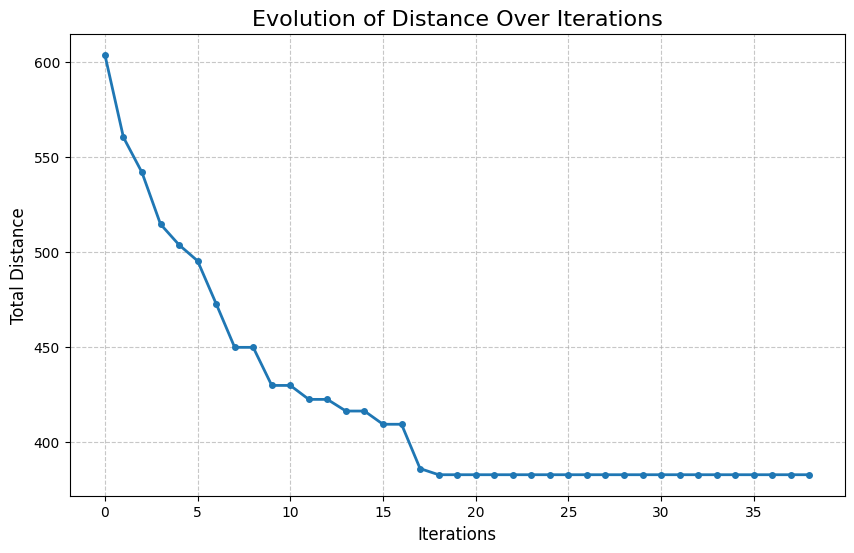

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(clonalg.cost_history, marker='o', linewidth=2, markersize=4)
plt.title('Evolution of Distance Over Iterations', fontsize=16)
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Total Distance', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

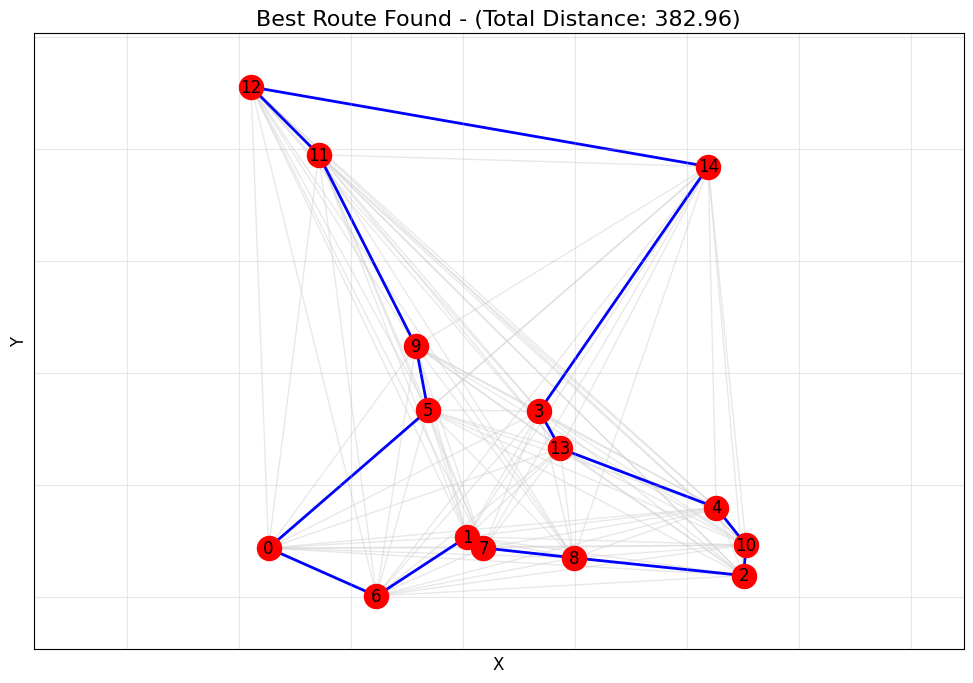

In [7]:
def plot_all_routes_with_best(cities, best_route, title):
    G = nx.Graph()
    for i, (x, y) in enumerate(cities):
        G.add_node(i, pos=(x, y))
    all_edges = list(combinations(range(len(cities)), 2))
    G.add_edges_from(all_edges)
    
    # Add edges of the best route for emphasis
    best_route_extended = list(best_route) + [best_route[0]]  # Close the cycle
    best_edges = [(best_route_extended[i], best_route_extended[i+1]) for i in range(len(best_route_extended)-1)]
    
    pos = nx.get_node_attributes(G, 'pos')
    
    plt.figure(figsize=(12, 8))
    
    # Draw all edges
    nx.draw_networkx_edges(G, pos, edgelist=all_edges, edge_color='lightgray', alpha=0.5)
    # Highlight best route edges
    nx.draw_networkx_edges(G, pos, edgelist=best_edges, edge_color='blue', width=2)
    
    nx.draw_networkx_nodes(G, pos, node_size=300, node_color='red')
    nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')
    
    plt.title(title, fontsize=16)
    plt.xlabel('X', fontsize=12)
    plt.ylabel('Y', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.axis('equal')
    plt.show()

if clonalg.best_solution is not None:
    plot_all_routes_with_best(
        cities,
        clonalg.best_solution,
        f'Best Route Found - (Total Distance: {clonalg.best_cost:.2f})'
    )